# Проект: Игровая платформа (сборный проект №1)

***Цель проекта***

Выявить определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании

***Описание проекта***

Интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Данные за 2016 год.

***Описание данных***

- ***Name*** — название игры
- ***Platform*** — платформа
- ***Year_of_Release*** — год выпуска
- ***Genre*** — жанр игры
- ***NA_sales*** — продажи в Северной Америке (миллионы долларов)
- ***EU_sales*** — продажи в Европе (миллионы долларов)
- ***JP_sales*** — продажи в Японии (миллионы долларов)
- ***Other_sales*** — продажи в других странах (миллионы долларов)
- ***Critic_Score*** — оценка критиков (максимум 100)
- ***User_Score*** — оценка пользователей (максимум 10)
- ***Rating***
— рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

***План работы***

- 1. Загрузка данных
- 2. Предобработка данных
- 3. Исследовательский анализ данных
- 4. Портрет пользователя каждого региона
- 5. Проверка гипотез
- 6. Общий вывод

### Загрузка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [3]:
# чтение файла csv и сохранение в df и разделим данные на столбцы
try:
    data = pd.read_csv('/Users/irinakuzina/Desktop/games.csv')
except:
    data = pd.read_csv('/datasets/logs_exp.csv')

In [4]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

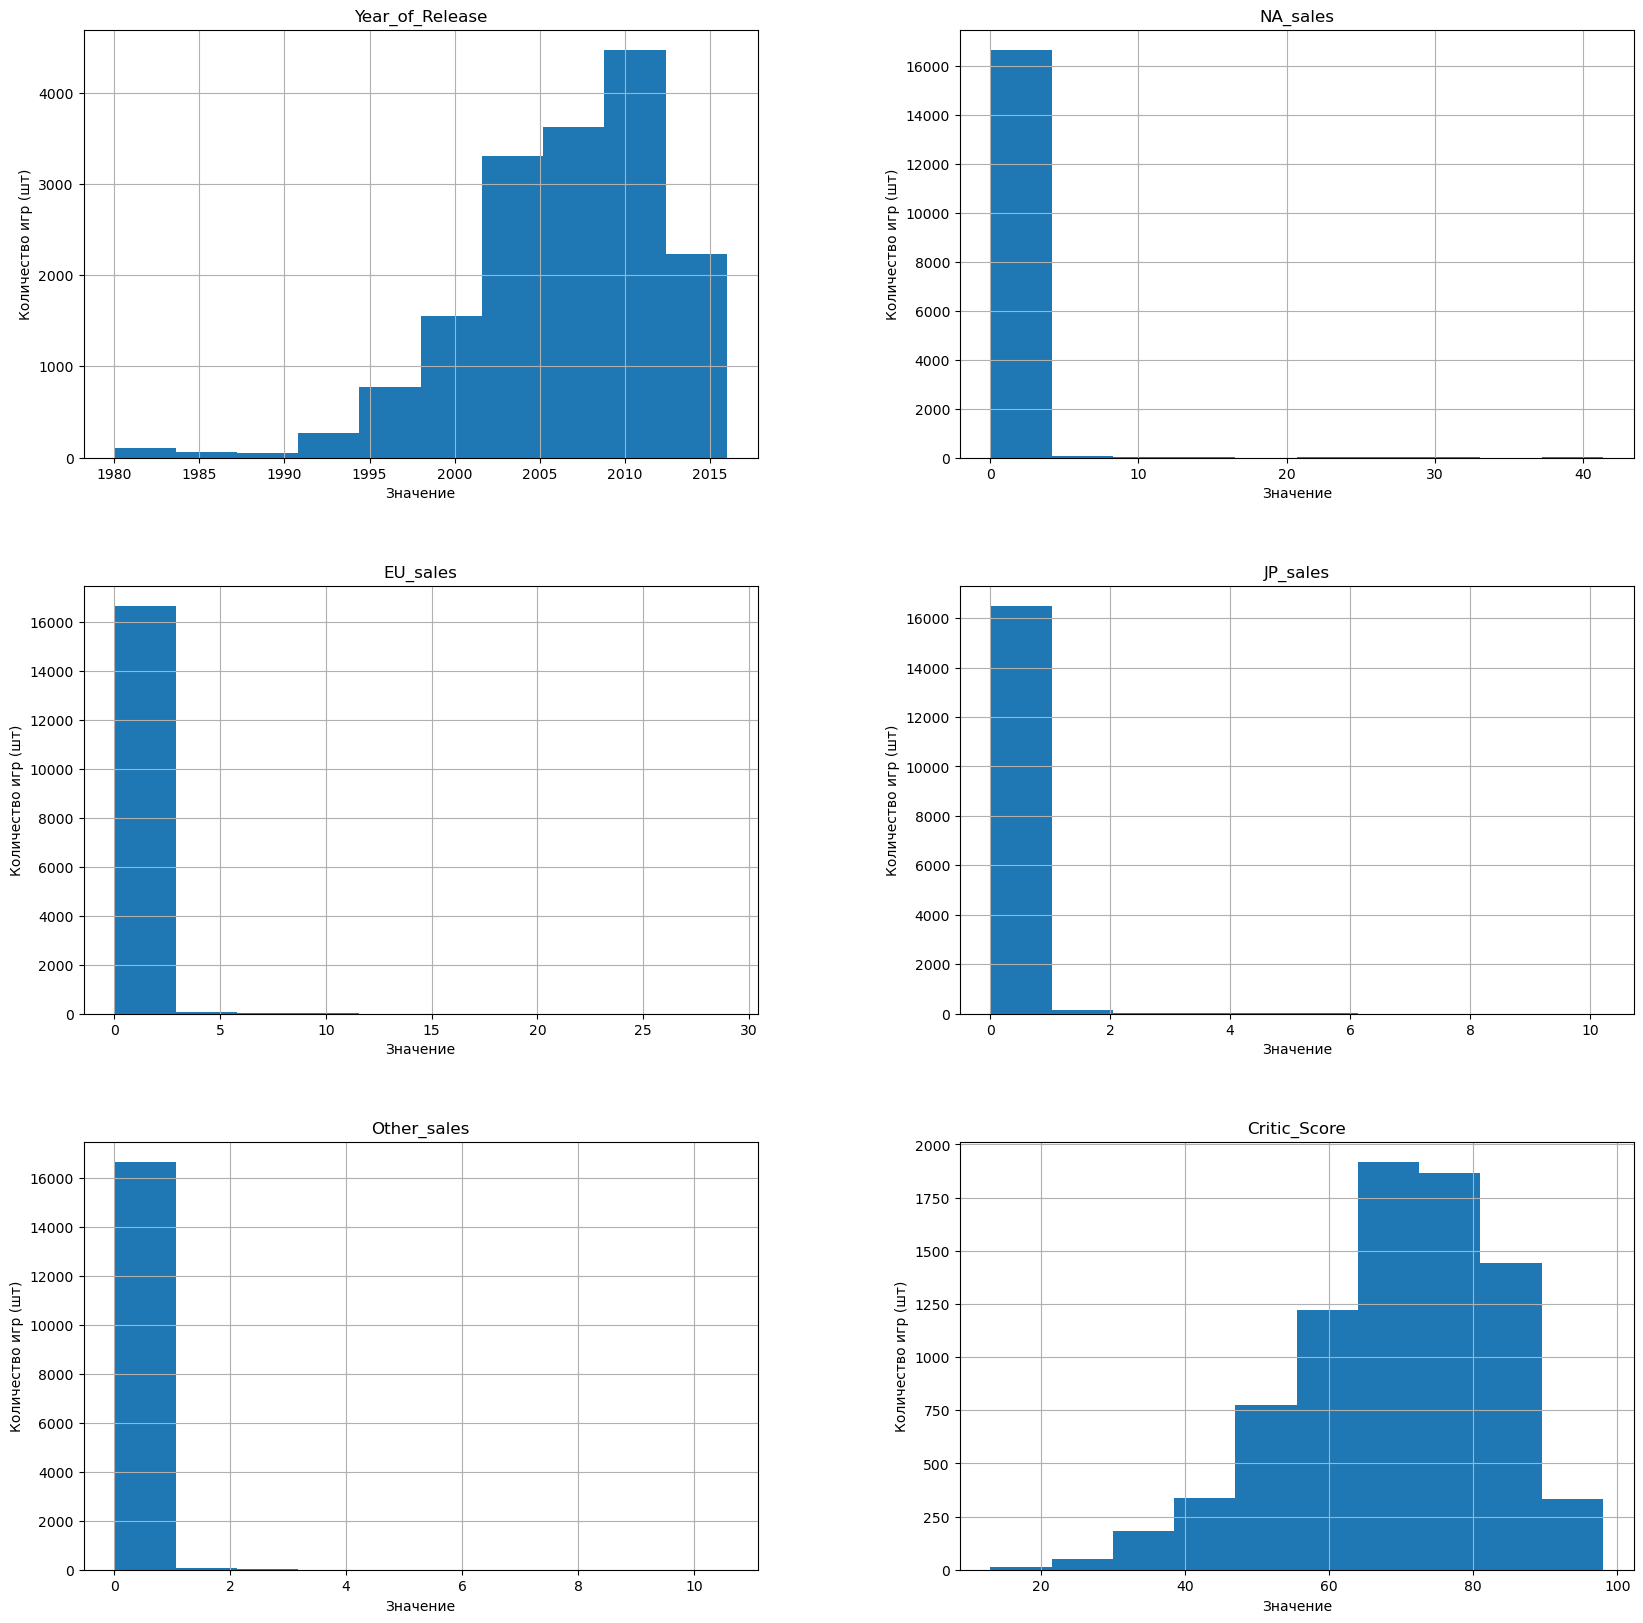

In [7]:
axes = data.hist(figsize=(20,20))
axes[0,0].set_xlabel('Значение')
axes[0,0].set_ylabel('Частота')
for ax in axes.flat:
    ax.set(xlabel='Значение', ylabel='Количество игр (шт)')

plt.show()

Вывод по гистограммам:
- Явных выбросов в данных нет.
- Сразу можно выделить период активного роста популярности игр-начиная с 2002-2005 года
- Больший объем продаж приходится на рынок США
- Самая популярная оценка пользователей около 8, у критиков- 70</font>

In [8]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


***Вывод:***
- Необходимо привести название столбцов к змеиному регистру
- В данных есть пропуски, нужно обработать там, где это возможно
- Привести столбец 'Year_of_Release', 'critic_score' к формату int64
- Проверить данные на явные и неявные дубликаты
- Обработать tbd в столбце в столбце 'User_Score' и изменить формат на float64
- Явных выбросов в данных нет, большие октлонения от среднего в продажах млн.копий предположительно свзяаны с популярностью определенных игр
- ***Мною данные признаны полными, можно переходить к их предобработке***

### Предобработка данных

In [9]:
#Приведем название столбцов к змениному регистру
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [10]:
#Изменим тип данных в столбце year_of_release 
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Вывод: 
- Данные пропущены в столбцах 'year_of_release', 'critic_score','user_score','rating','name','genre'
- В 'name','genre' пропущены по 2 значения-ими можно пренебречь
- В 'critic_score','user_score','rating' большое количество пропусков, но обработать их невозможно, и удалить их нельзя, так как игры могут быть новыми.Оставляем без изменений

In [12]:
#Удаляем данные в столбцах  'Name','Genre'
data = data.dropna(subset = ['name','genre'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.5+ MB


In [13]:
data.loc[data['rating'].isna(),'platform'].head(30)

1      NES
4       GB
5       GB
9      NES
10      DS
12      GB
18    SNES
20      DS
21      GB
22     NES
25     GBA
27      DS
30      GB
31     PS4
33     3DS
45     N64
46      DS
47     3DS
50      GB
56    SNES
58     GBA
59      DS
63     N64
71    SNES
72    X360
76    SNES
82     N64
83      DS
86     Wii
87     PS4
Name: platform, dtype: object

Вывод:
 - В 'name','genre' пропущены по 2 значения-ими можно пренебречь (менее 1% пропусков)

 - В 'critic_score','user_score','rating' большое количество пропусков. Предполагаю, что игры могут быть новинками и их еще не успели оценить критики и пользователи.Или эти игры не очень популярны(интересны), поэтому также остались без внимания. Еще есть распространенный вариант- проблемы при выгрузке данных.Всегда лучше перепроверить эту информацию у разарботчиков, которые выгружали данные
 - Так как вариантнов их обработать нет и удалить их нельзя, так как в дальнейшем исказть нам анализ.Оставляем без изменений
 - tbd можно расшифровать как to be determined (будет определено) или to be discussed (выносится на обсуждение)
заменим на NaN

 - Больше 40% пропусков в столбце рейтинг возможно связано с тем, что оценки выставляло Американское рейтинговое агенство, а пропуски для игр на японских консолях. Намеренно они не проставляли рейтинги у своих главных конкурентов или по-договоренности, нам не известно</font>

In [14]:
#Зaполним данные в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].fillna(data.groupby(by=['name'])['year_of_release'].transform('max'))

In [15]:
data['year_of_release'].isna().sum() #Заполнили 123 пропуска

146

In [16]:
#Проверяем явные дубликаты
data.duplicated().sum() #Явные дубликаты не обнаружены

0

In [17]:
#Проверили неявные дубликаты для пары "Имя - Игровая консоль"

data.duplicated(subset=['name','platform']).sum()

4

Их всего 4, их можно не трогать, на общие выводы никак не повлияют

In [18]:
#Проверяем неявные дубликаты по столбцам
data['platform'].value_counts()

platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [19]:
data['genre'].value_counts()

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64

In [20]:
#tbd можно расшифровать как to be determined (будет определено) или to be discussed (выносится на обсуждение)
#заменим на NaN
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [21]:
#Поменяем формат столбца user_score на float
data['user_score'] = data['user_score'].astype(float)
data['user_score'].dtype

dtype('float64')

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


***Вывод:***
- Привели названия всех столбцов к змеиному регистру
- Поменяли типы данных в столбцах 'year_of_release','critic_score' на int64, а в столбце 'user_score' на float64
- Удалили в столбцах 'name','genre' пропущеные 2 значения
- В 'critic_score','user_score','rating' большое количество пропусков, но обработать их невозможно, и удалить их нельзя, так как игры могут быть новыми.Оставляем без изменений
- Кореляция тепловых карт дала возможность заполнить 123 пропуска в 'year_of_release' по столбцу 'name' с дургих платформ
- Явные и неявные дубликаты не обнаружены


### Исследовательский анализ данных

***Посмотрим, сколько игр выпускалось в разные годы.Важны ли все периоды?***

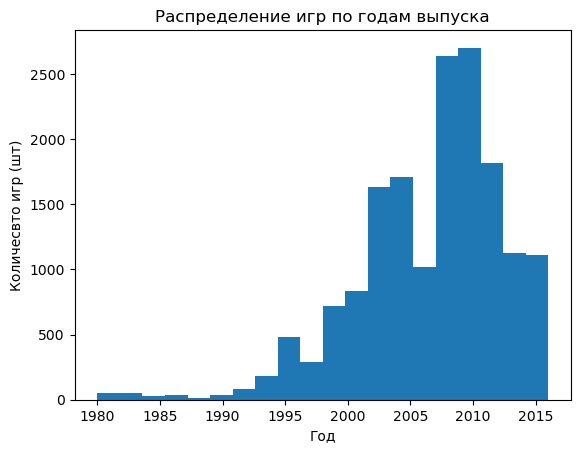

In [23]:
data['year_of_release'].plot(kind ='hist',bins = 20)
plt.title('Распределение игр по годам выпуска')
plt.xlabel("Год")
plt.ylabel("Количесвто игр (шт)")
plt.show()

In [24]:
#Проверим количество дубликатов Год - Названия игры

data.duplicated(subset=['name','year_of_release']).sum()

4385

In [25]:
#Отфильтруем данные без учета дубликатов

data_duplicated = data[~data.duplicated(subset=['name','year_of_release'])]
data_duplicated.count()

name               12328
platform           12328
year_of_release    12195
genre              12328
na_sales           12328
eu_sales           12328
jp_sales           12328
other_sales        12328
critic_score        5225
user_score          4774
rating              6352
total_sales        12328
dtype: int64

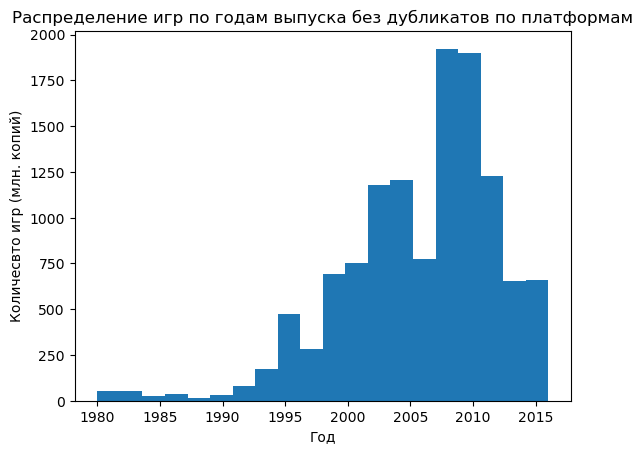

In [26]:
#Посмотрим, сколько игр выпускалось в разные годы без учета дубликатов
data_duplicated['year_of_release'].plot(kind ='hist',bins = 20)
plt.title('Распределение игр по годам выпуска без дубликатов по платформам',fontsize = 12)
plt.xlabel("Год")
plt.ylabel("Количесвто игр (млн. копий)")
plt.show()

Вывод: Исключение дубликатов не повлияло на общую динамику, мы также С 1995г - 2008г наблюдаем фазу активного роста, а с 2010 года рецессию

Вывод: 
- До 1995 года развитие игр на игровых платформах было несущественное-эти данные не берем в расчет
- С 1995г - 2008г мы наблюдаем ***фазу активного роста***
- C 2010г наступает рецессия. Предполагаю, что это связано с появлением игр на мобильных устройствах

***Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы?***

In [27]:
data_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
data_platforms

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


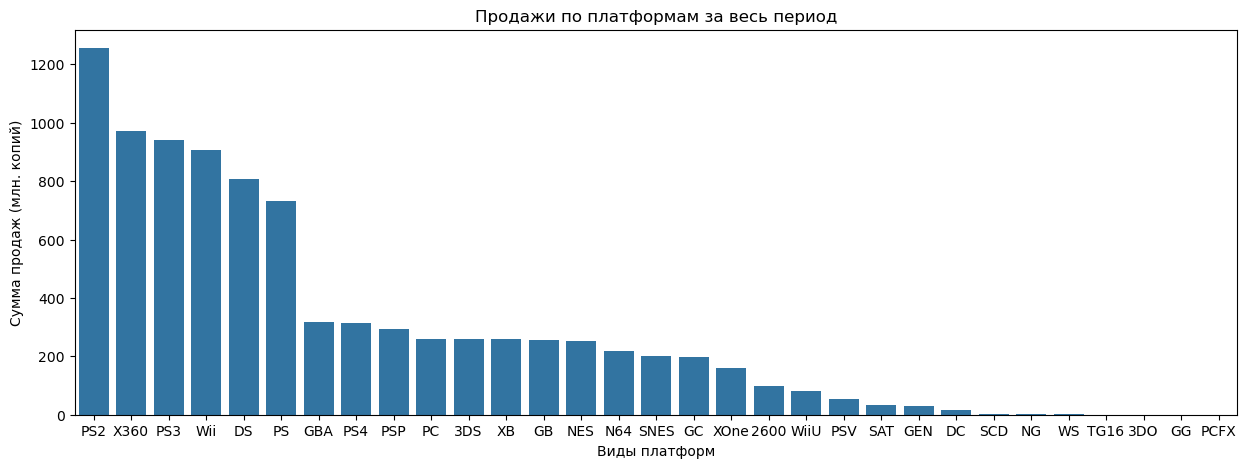

In [28]:
plt.figure(figsize=(15,5))
sns.barplot(x=data_platforms.index,y=data_platforms['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Виды платформ")
plt.ylabel("Cумма продаж (млн. копий)")
plt.show()

Вывод: Из расчетов и графика видно, что PS2,X360,PS3,Wii,DS,PS - это 6 лидеров.Разрыв продаж между 6м PS и 7м GBA почти в 2 раза

In [29]:
#параметры: 
#index — столбец, значения которого становятся названиями строк (индексом);
#columns — столбец, значения которого становятся названиями столбцов;
#values — значения, по которым вы хотите увидеть сводную таблицу;
#aggfunc — функция, применяемая к значениям.

In [30]:
#Выберем топ 6 платформ
tmp = data.pivot_table(index='platform', values='total_sales', aggfunc= 'sum').sort_values('total_sales', ascending=False)

tmp.index[:6].tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

In [31]:
#Постороим сводную по годам

data_top6_platforms = data.query('platform == ["PS2","X360","PS3","Wii","DS","PS"]')
data_top6_platforms_years = data_top6_platforms\
.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
data_top6_platforms_years.head()

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,6.03,NaN,NaN,NaN,NaN
1995,NaN,35.96,NaN,NaN,NaN,NaN
1996,NaN,94.70,NaN,NaN,NaN,NaN
1997,NaN,136.17,NaN,NaN,NaN,NaN


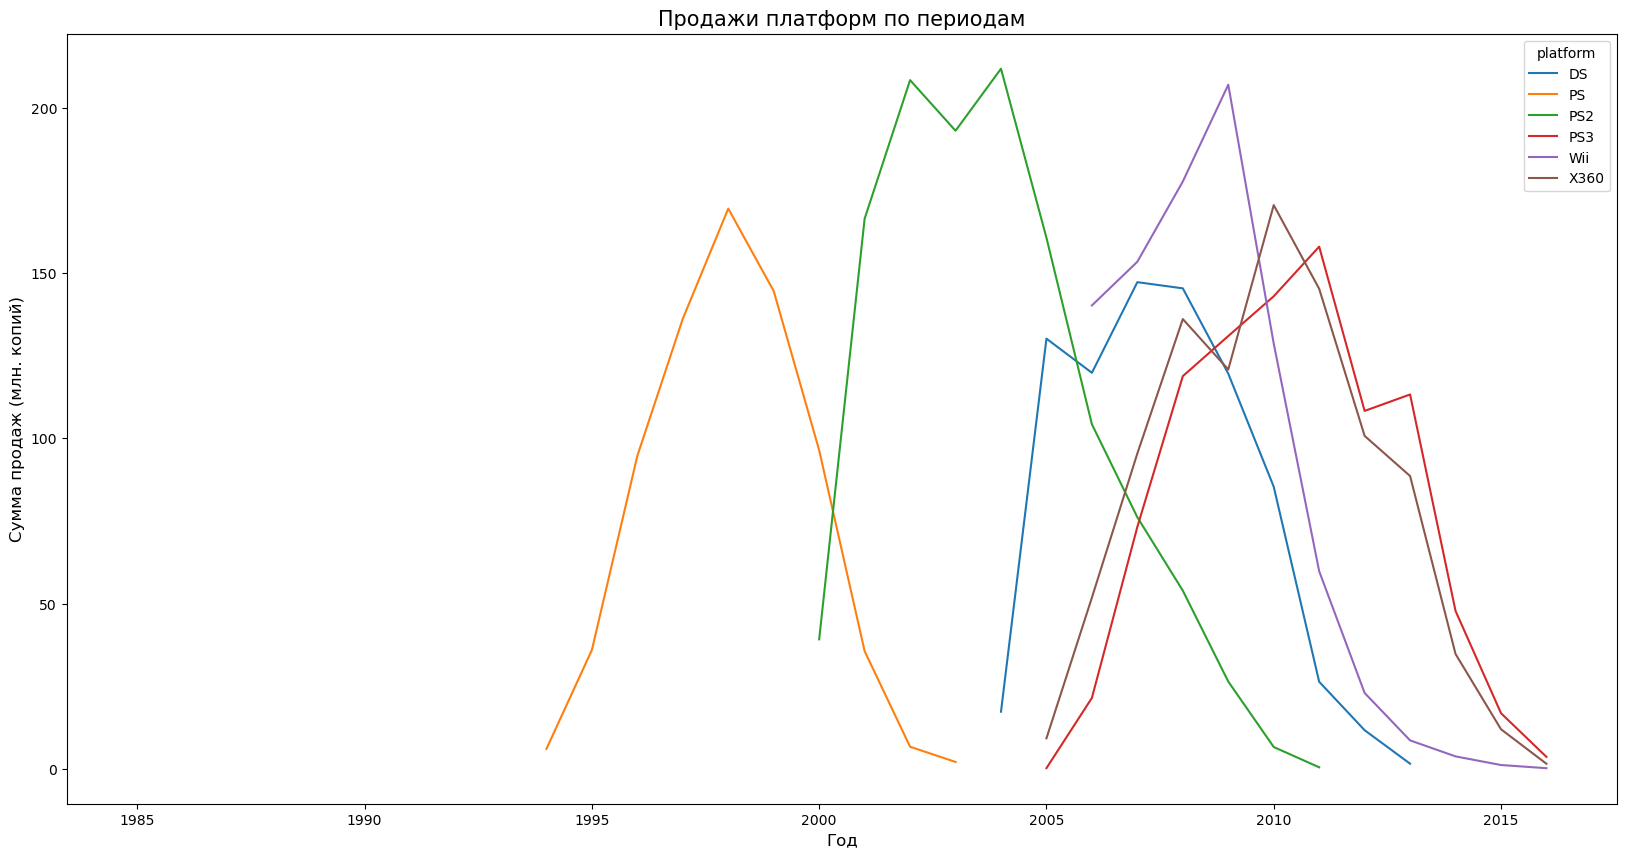

In [32]:
data_top6_platforms_years.plot(figsize = (20,10))
plt.title("Продажи платформ по периодам",fontsize = 15)
plt.xlabel("Год",fontsize = 12)
plt.ylabel("Cумма продаж (млн. копий)",fontsize = 12)
plt.show()

Вывод: 
- Средний жизненный цикл игровой консоли составляет ***8-10*** лет
- Фаза активного роста - ***5 лет***, потом рецессия и уход с рынка

***Возьмем данные за соответствующий актуальный период.Основной фактор — эти данные помогут построить прогноз на 2017 год.***

Если мы строим прогноз на 2017 год, то нам нужны платформы, которые будут в продаже в этот период и желательно в фазе роста или в пике жизненного цикла. Исходя из предыдущего анализа, мы должны взять данные по консолям за предыдущие 5 лет, т.е. начиная с ***2012 года***.

***Не учитываем в работе данные за предыдущие годы.
Определим, какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ***

In [33]:
#Выбираем для анализа данные с 2012 года

data_since2012 = data.query('year_of_release >= 2012')
data_since2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [34]:
data_platforms_2012 = data_since2012.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')\
.sort_values(by='total_sales', ascending=False)
data_platforms_2012

,total_sales
platform,
PS4,314.14
PS3,289.71
X360,237.52
3DS,195.01
XOne,159.32
WiiU,82.19
PC,63.51
PSV,49.18
Wii,36.60


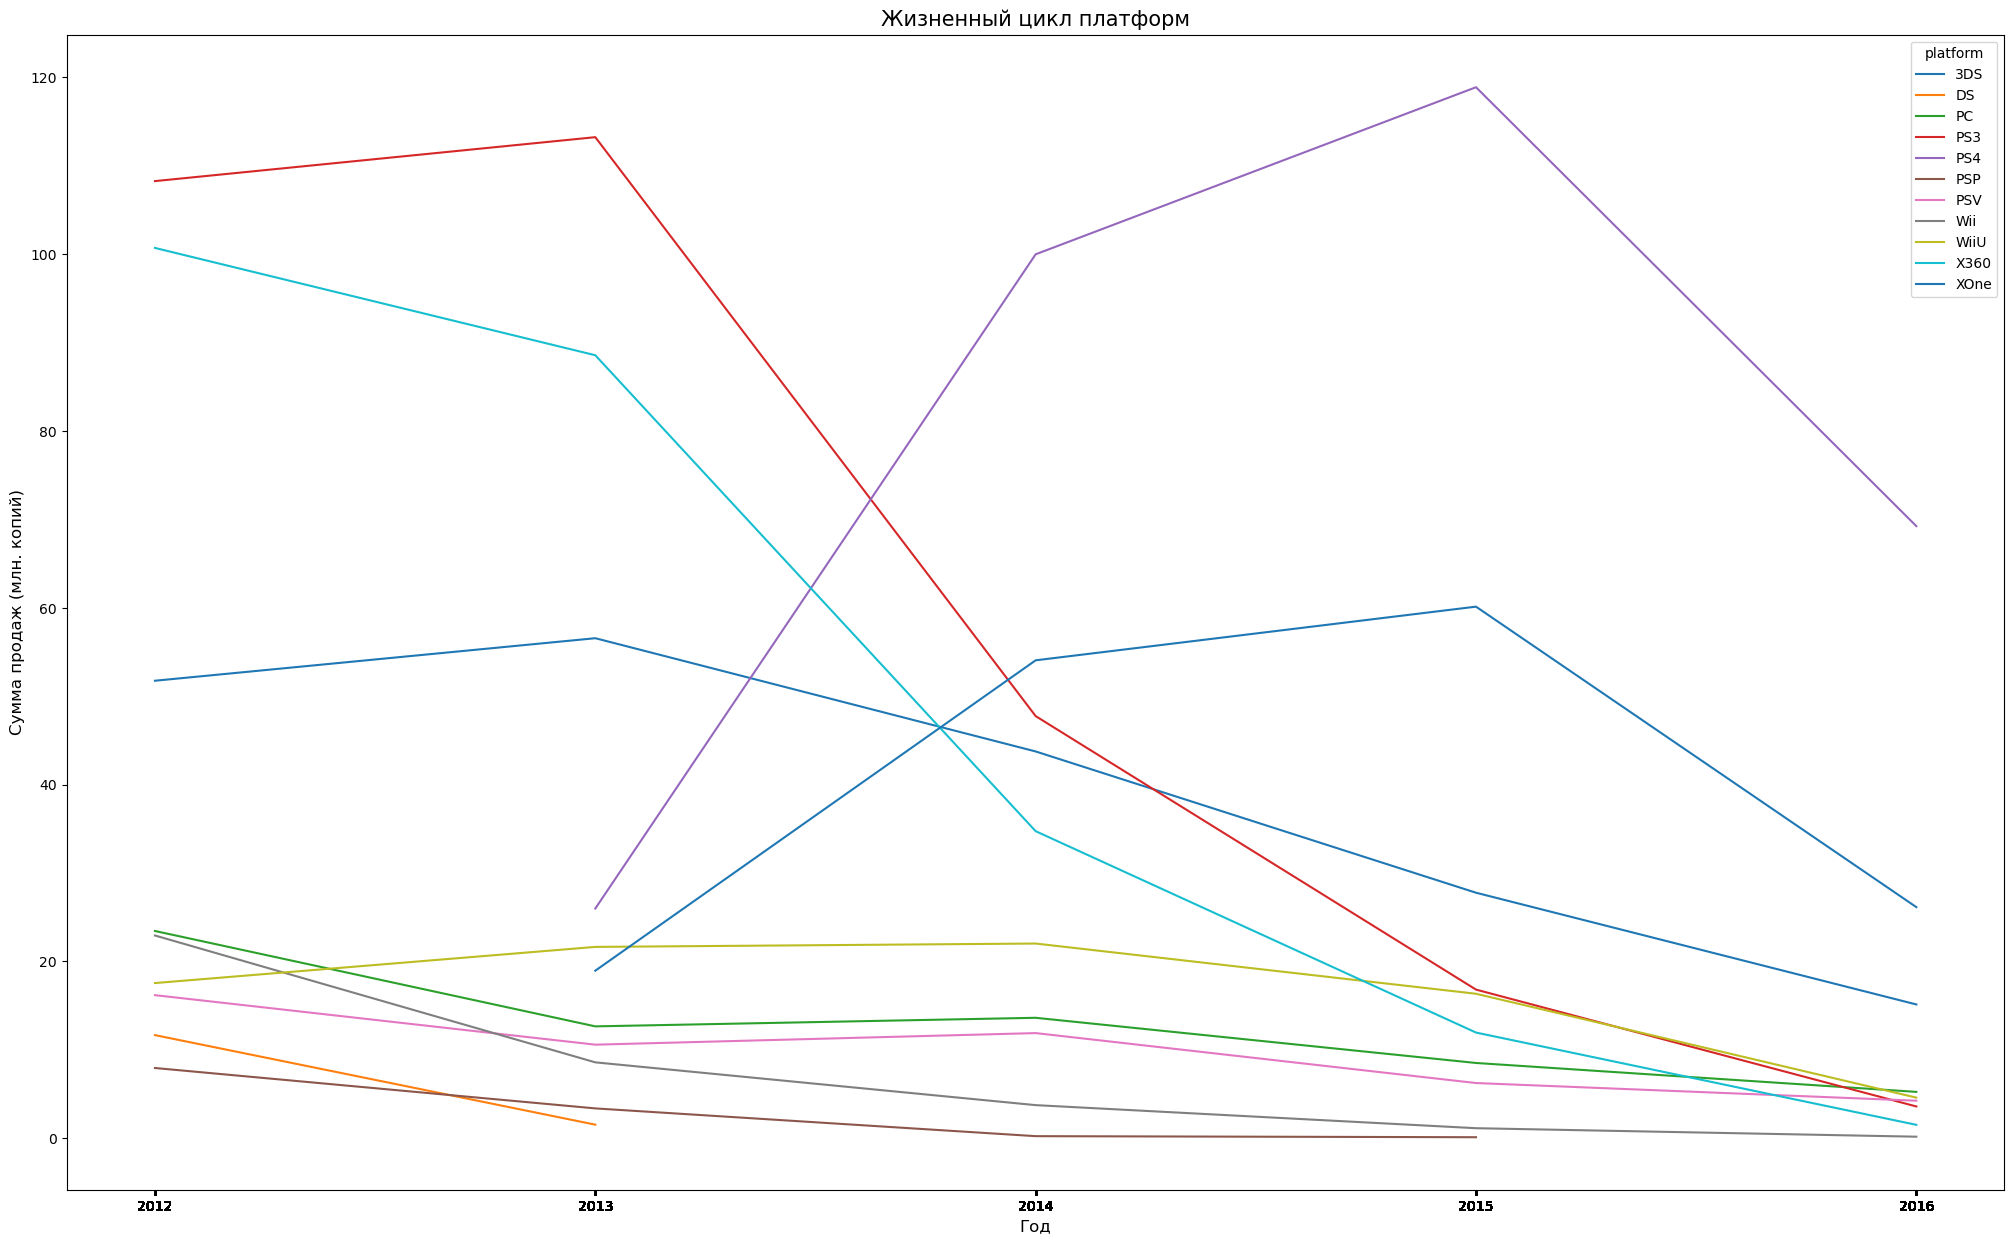

In [35]:
# Определим жизненный цикл каждой платформы по периодам

data_platforms_since2012_year = data_since2012\
.pivot_table(index = 'year_of_release',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
data_platforms_since2012_year.plot(figsize = (25,15))
plt.xticks(data_since2012['year_of_release'].tolist()) #Убираем полугодия
plt.title("Жизненный цикл платформ",fontsize = 15)
plt.xlabel("Год",fontsize = 12)
plt.ylabel("Cумма продаж (млн. копий)",fontsize = 12)
plt.show()

Вывод:
- Предположительно, в 2017 никто из существующих консолей не будут показывать рост
- Прибыль принесут только ***PS4*** и ***XOne***,так как они вышли позже.Все остальные платформы уйдут

***Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат***

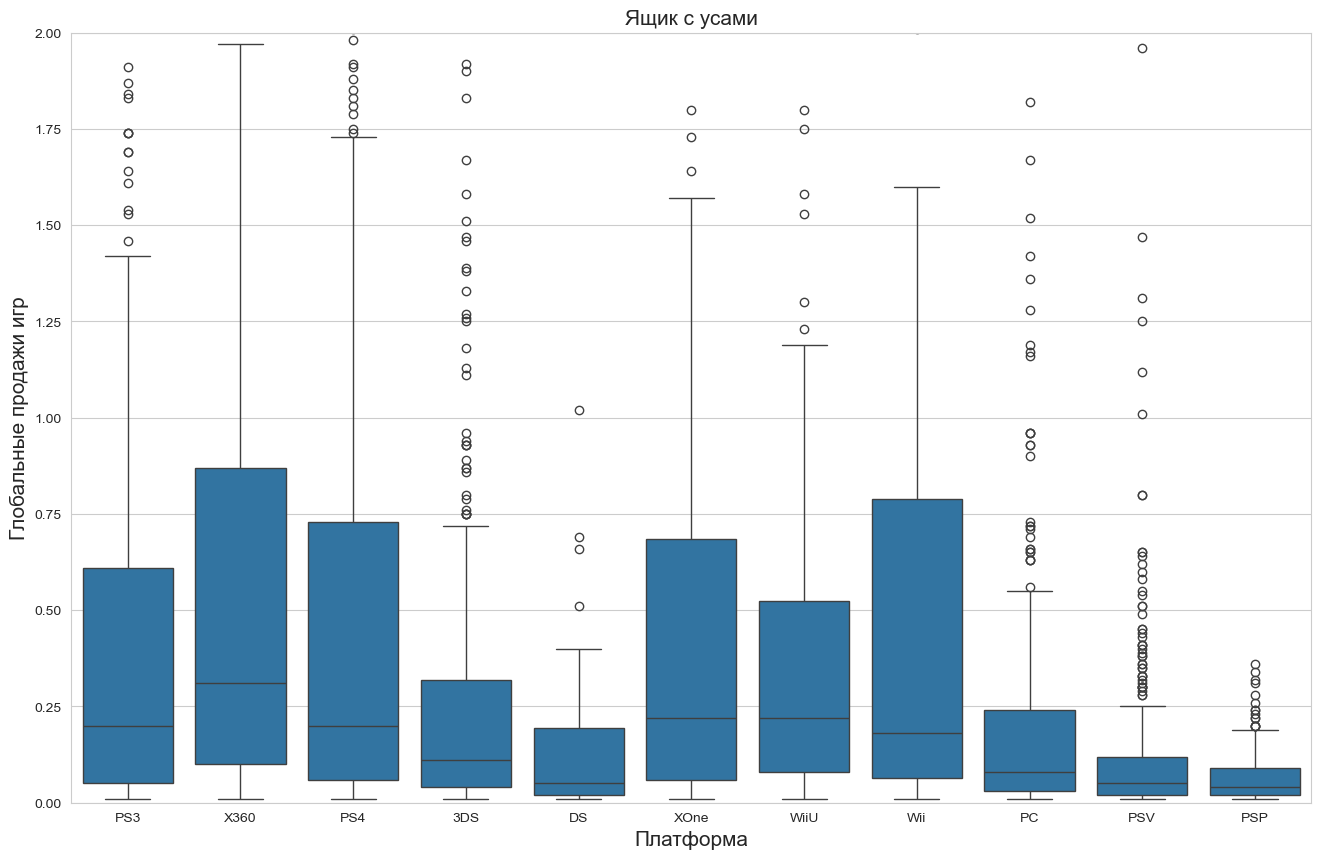

In [36]:
#Анализируем данные с 2012 года

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
sns.boxplot(x= 'platform', y='total_sales', data=data_since2012)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи игр',fontsize=15)
plt.ylim([0, 2])

plt.show()

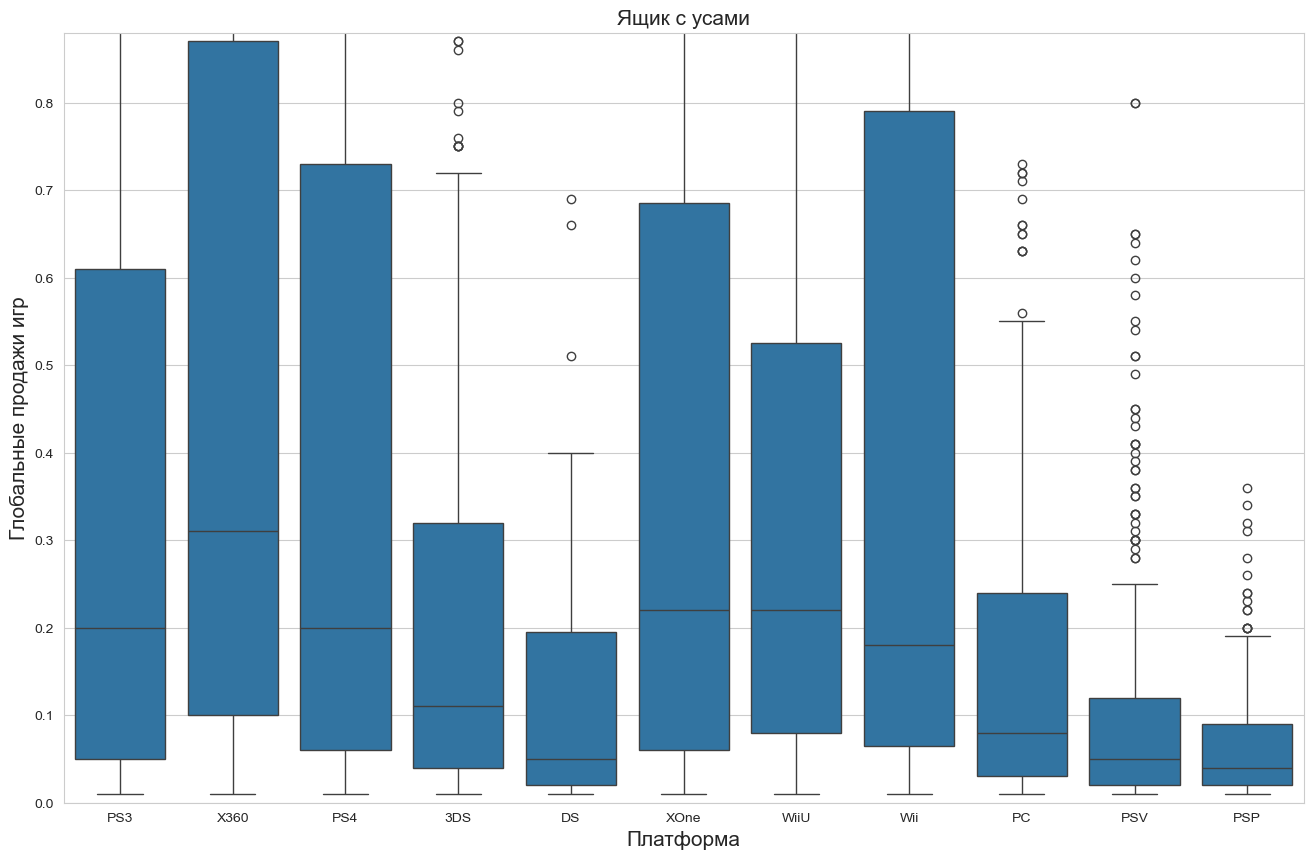

In [37]:
# Посторим график "Ящик с усами" с новыми параметрами ylim(0, 0.88)

plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
sns.boxplot(x= 'platform', y='total_sales', data=data_since2012)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи игр',fontsize=15)
plt.ylim([0, 0.88])

plt.show()

In [38]:
#Для точного сравнения "ящиков" используем describe()
boxplot = data_since2012\
.pivot_table(index = 'name',columns = 'platform', values = 'total_sales', aggfunc = 'sum')
boxplot.describe()

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
count,397.000000,32.000000,255.000000,493.000000,392.000000,175.000000,411.000000,55.000000,147.000000,294.000000,247.000000
mean,0.491209,0.412813,0.249059,0.587647,0.801378,0.066800,0.119659,0.665455,0.559116,0.807891,0.645020
std,1.385416,1.416559,0.490149,1.462729,1.609456,0.073594,0.203011,1.157206,1.058836,1.706880,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.020000,0.030000,0.050000,0.060000,0.020000,0.020000,0.065000,0.080000,0.100000,0.060000
50%,0.110000,0.050000,0.080000,0.200000,0.200000,0.040000,0.050000,0.180000,0.220000,0.310000,0.220000
75%,0.320000,0.195000,0.240000,0.610000,0.730000,0.090000,0.120000,0.790000,0.525000,0.870000,0.685000
max,14.600000,8.060000,5.140000,21.050000,14.630000,0.360000,1.960000,6.760000,7.090000,16.270000,7.390000


Вывод:
- Мы оценили продажи по платформам начиная с 2012 года
- У всех консолей разные медианы продаж,аномалий не наблюдается
- Топ 5 рейтинга(75% квартиль выше, чем у остальных консолей): X360,Wii, PS4, Xone,PS3

***Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы***

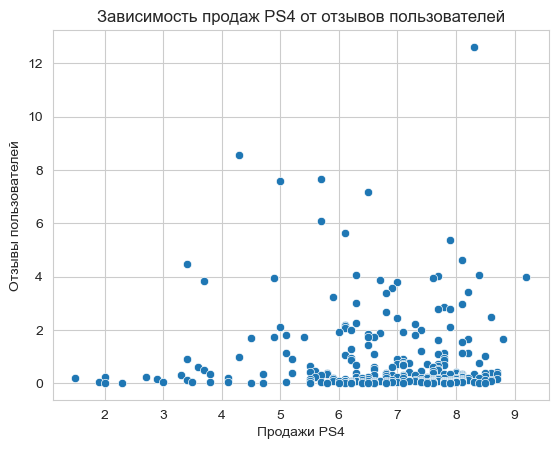

In [39]:
#Выберем популярную платформу PS4
#Зависимость продаж от отзывов пользователей
PS4_data = data_since2012.query('platform == "PS4"')
sns.scatterplot(data=PS4_data, x="user_score", y="total_sales")
plt.title('Зависимость продаж PS4 от отзывов пользователей')
plt.xlabel('Продажи PS4')
plt.ylabel('Отзывы пользователей')

plt.show()


In [40]:
PS4_data['user_score'].corr(PS4_data['total_sales']).round(2)# Проверим кореляцию

-0.03

Вывод: Оценки пользователей не влияют на продажи. Коэффициент корреляции практически равен 0

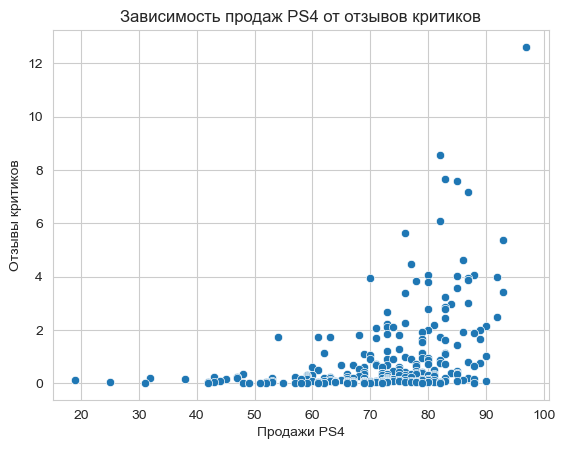

In [41]:
#Выберем популярную платформу PS4
#Зависимость продаж от отзывов критиков
PS4_data = data_since2012.query('platform == "PS4"')
sns.scatterplot(data=PS4_data, x="critic_score", y="total_sales")
plt.title('Зависимость продаж PS4 от отзывов критиков')
plt.xlabel('Продажи PS4')
plt.ylabel('Отзывы критиков')

plt.show()

In [42]:
PS4_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 31 to 16585
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             392 non-null    object 
 1   platform         392 non-null    object 
 2   year_of_release  392 non-null    Int64  
 3   genre            392 non-null    object 
 4   na_sales         392 non-null    float64
 5   eu_sales         392 non-null    float64
 6   jp_sales         392 non-null    float64
 7   other_sales      392 non-null    float64
 8   critic_score     252 non-null    float64
 9   user_score       257 non-null    float64
 10  rating           255 non-null    object 
 11  total_sales      392 non-null    float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 40.2+ KB


In [43]:
PS4_data['critic_score'].corr(PS4_data['total_sales']).round(2)# Проверим кореляцию

0.41

Вывод: У критиков выражена прямую, средне-слабая корреляцию с "цифрами" продаж для PS4. Оценки пользователей корреляции с продажами не имеют.

***Соотнесем выводы с продажами игр на других платформах***

In [44]:
#Tоп 5 рейтинга: X360, PS4,PS3, Xone, Wii
#Напишем функцию для расчета корреляции
def other_platform(name):
    platform = data_since2012[data_since2012['platform']==name]
    user_correl = platform['user_score'].corr(platform['total_sales'])
    critic_correl = platform['critic_score'].corr(platform['total_sales'])
    print('Корреляция между отзывами критиков и игровой платформой',name,'равна', critic_correl.round(2))
    print('Корреляция между отзывами пользователей и игровой платформой', name,'равна', user_correl.round(2))
    print('\n')

In [45]:
list = ['X360','PS3', 'XOne', 'Wii']
for platform in list:
    other_platform(platform)

Корреляция между отзывами критиков и игровой платформой X360 равна 0.36
Корреляция между отзывами пользователей и игровой платформой X360 равна 0.01


Корреляция между отзывами критиков и игровой платформой PS3 равна 0.33
Корреляция между отзывами пользователей и игровой платформой PS3 равна -0.01


Корреляция между отзывами критиков и игровой платформой XOne равна 0.42
Корреляция между отзывами пользователей и игровой платформой XOne равна -0.07


Корреляция между отзывами критиков и игровой платформой Wii равна -0.41
Корреляция между отзывами пользователей и игровой платформой Wii равна 0.28




Вывод: Оценки критиков для платформ 'X360','PS3', 'XOne' демонстрируют прямую, слабоположительную корреляция с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.Для платформы Wii наоборот - наблюдается слабоположительную корреляция оценок от пользователей с "цифрами" продаж, а оценки критиков корреляции с продажами не имеют

***Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?***

In [46]:
data_genre = data_since2012.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False)
data_genre

,total_sales
genre,
Action,446.41
Shooter,304.75
Role-Playing,192.80
Sports,181.07
Misc,85.28
Platform,61.00
Racing,53.50
Fighting,44.49
Simulation,35.12


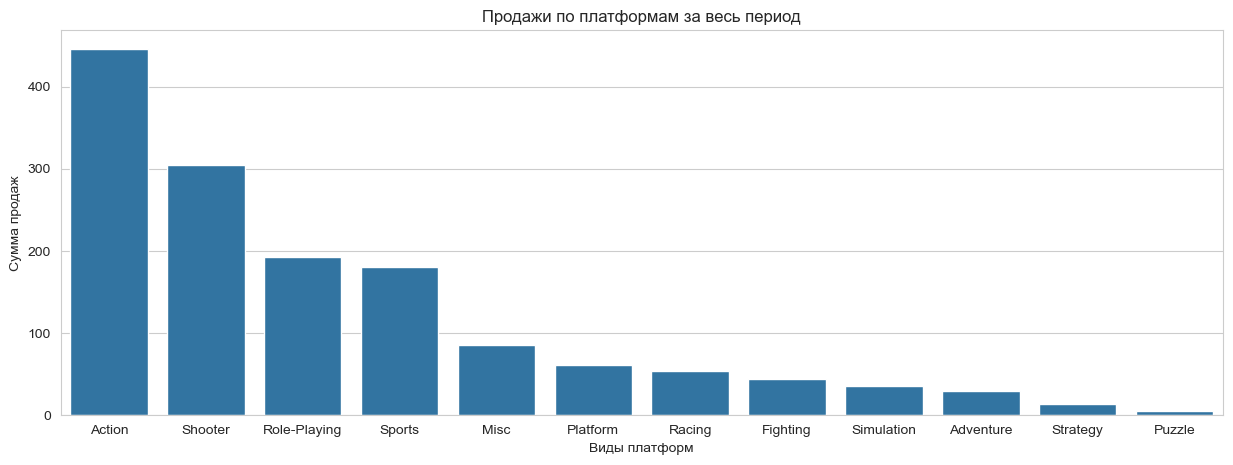

In [47]:
plt.figure(figsize=(15,5))
sns.barplot(x=data_genre.index,y=data_genre['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Виды платформ")
plt.ylabel("Cумма продаж")
plt.show()

In [48]:
meds = data_since2012.groupby('genre')[['total_sales']].median().sort_values(by='total_sales', ascending=False).index

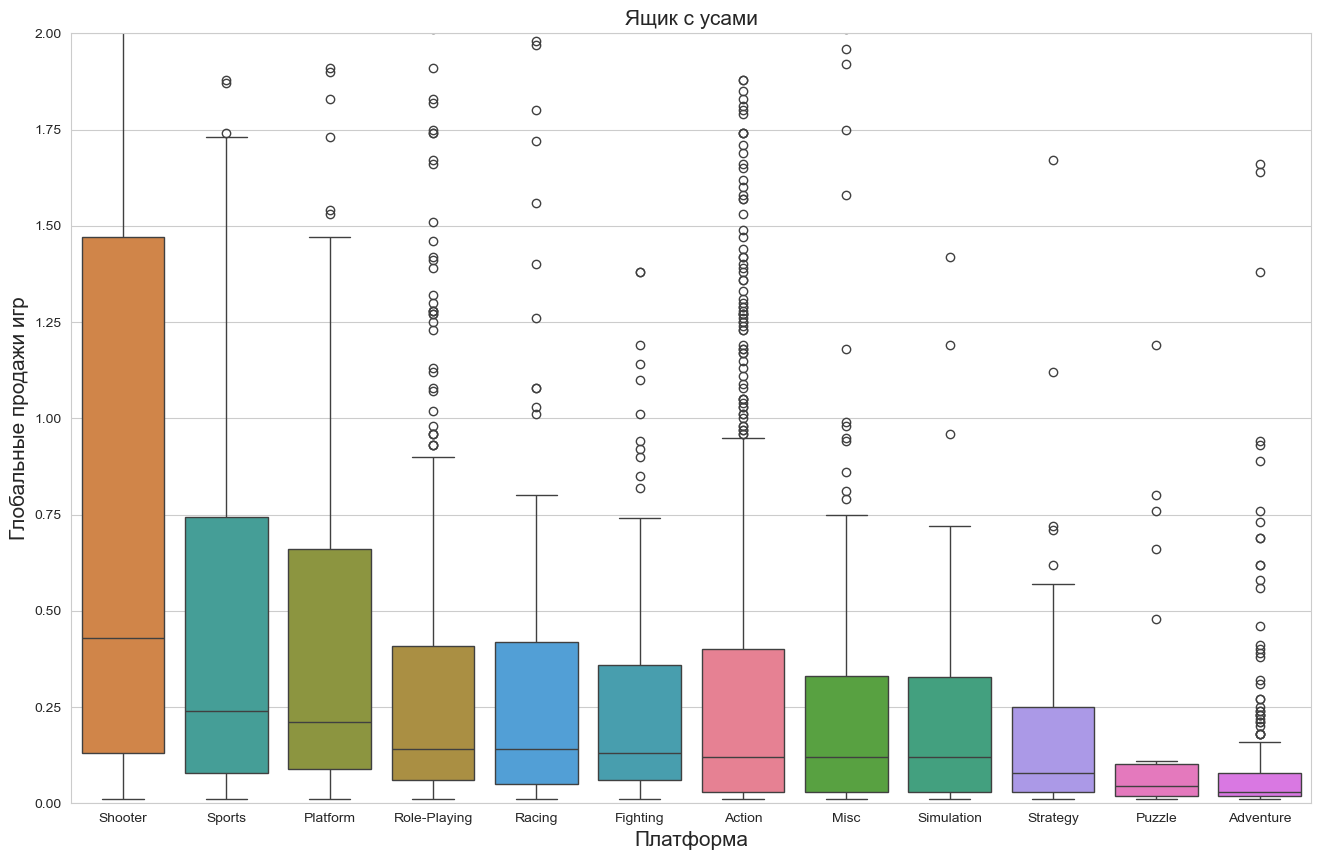

In [49]:
#Проверим на выбросы
#Анализируем данные с 2012 года
plt.figure(figsize=(16,10))
sns.set_style("whitegrid")
sns.boxplot(x= 'genre', y='total_sales', data=data_since2012,hue="genre",order = meds)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=15)
plt.ylabel('Глобальные продажи игр',fontsize=15)
plt.ylim([0, 2])

plt.show()

Вывод: Если исключить выбросы (очень прибыльные игры), то в лидеры выходит жанр ***Shooter***, на втором месте Sports, затем Platform(их медианы выше).В жанре Action много выбросов,поэтому общая прибыль по жанру Action выше остальных. Но медиана меньше.

***Вывод:***
- До 1995 года развитие игр на игровых платформах было несущественное-эти данные не берем в расчет
- С 1995г - 2008г мы наблюдаем фазу активного роста. C 2010г наступает рецессия. Предполагаю, что это связано с появлением игр на мобильных устройствах
- ***PS2,X360,PS3,Wii,DS,PS*** - это 6 лидеров.Разрыв продаж между 6м PS и 7м GBA почти в 2 раза
- Средний жизненный цикл игровой консоли составляет 8-10 лет
- Фаза активного роста - 5 лет, потом рецессия и уход с рынка
- Для прогноза продаж на 2017 год нам нужны платформы, которые будут в продаже в этот период и желательно в фазе роста или в пике жизненного цикла. Исходя из предыдущего анализа, мы должны взять данные по консолям за предыдущие 5 лет, т.е. ***начиная с 2012 года***
- Предположительно, в 2017 никто из существующих консолей не будут показывать рост
- Прибыль принесут только PS4 и XOne,так как они вышли позже.Все остальные платформы уйдут
- Мы оценили продажи по платформам начиная с 2012 года.У всех консолей разные медианы продаж,аномалий не наблюдается
- Топ 5 рейтинга(75% квартиль выше, чем у остальных консолей): ***X360,Wii, PS4, Xone,PS3***
- У критиков выражена прямую, средне-слабая корреляцию с "цифрами" продаж для PS4. Оценки пользователей корреляции с продажами не имеют
- Оценки критиков для платформ 'X360','PS3', 'XOne' демонстрируют прямую, слабоположительную корреляция с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.Для платформы Wii наоборот - наблюдается слабоположительную корреляция оценок от пользователей с "цифрами" продаж, а оценки критиков корреляции с продажами не имеют
- Если исключить выбросы (очень прибыльные игры), то в ***лидеры выходит жанр Shooter***, на втором месте Sports, затем Platform(их медианы выше).В жанре Action много выбросов,поэтому ***общая прибыль по жанру Action выше остальных***. Но медиана меньше.

### Портрет пользователя каждого региона

***Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?***


In [50]:
def popular_platform(region):
    data_users = data_since2012.pivot_table(index = 'platform', values = region, aggfunc = 'sum') \
    .sort_values(ascending=False, by = region)
    print('Самые популярные платформы для', data_users)
    print('\n\n')
    data_users.plot(kind = 'bar', figsize=(15,5))

Самые популярные платформы для           na_sales
platform          
X360        140.57
PS4         108.74
PS3         103.74
XOne         93.12
3DS          55.49
WiiU         38.10
PC           19.26
Wii          18.14
PSV          10.98
DS            4.93
PSP           0.23



Самые популярные платформы для           eu_sales
platform          
PS4         141.09
PS3         107.27
X360         74.89
XOne         51.59
3DS          42.83
PC           38.38
WiiU         25.13
Wii          12.34
PSV          11.36
DS            3.78
PSP           0.52



Самые популярные платформы для           jp_sales
platform          
3DS          87.79
PS3          35.29
PSV          21.04
PS4          15.96
WiiU         13.01
PSP          10.71
DS            3.72
Wii           3.39
X360          1.57
XOne          0.34
PC            0.00





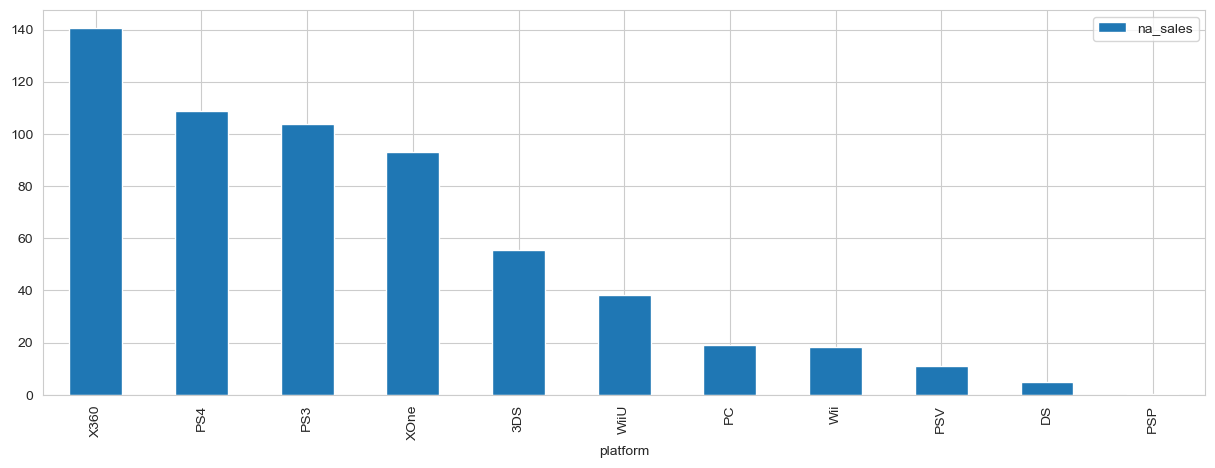

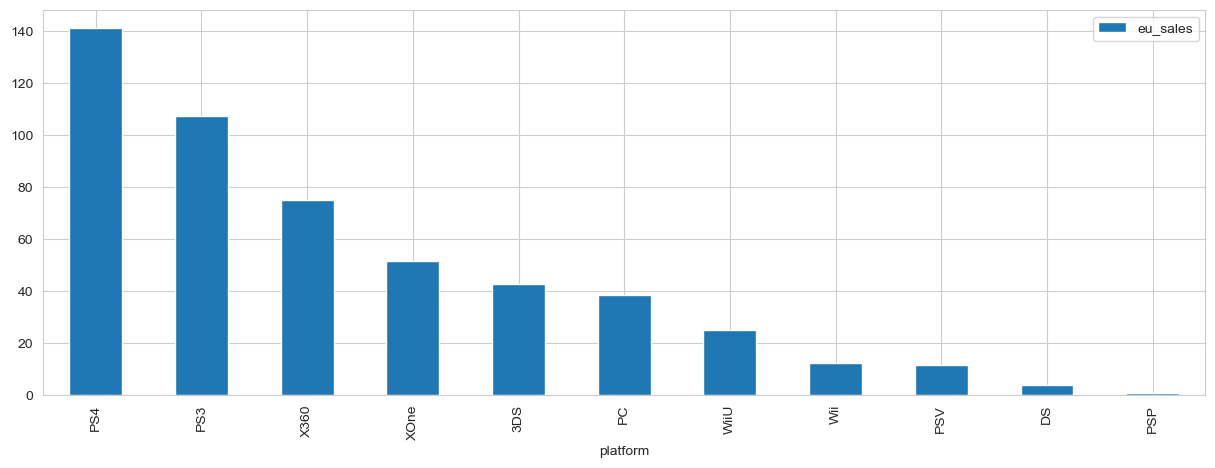

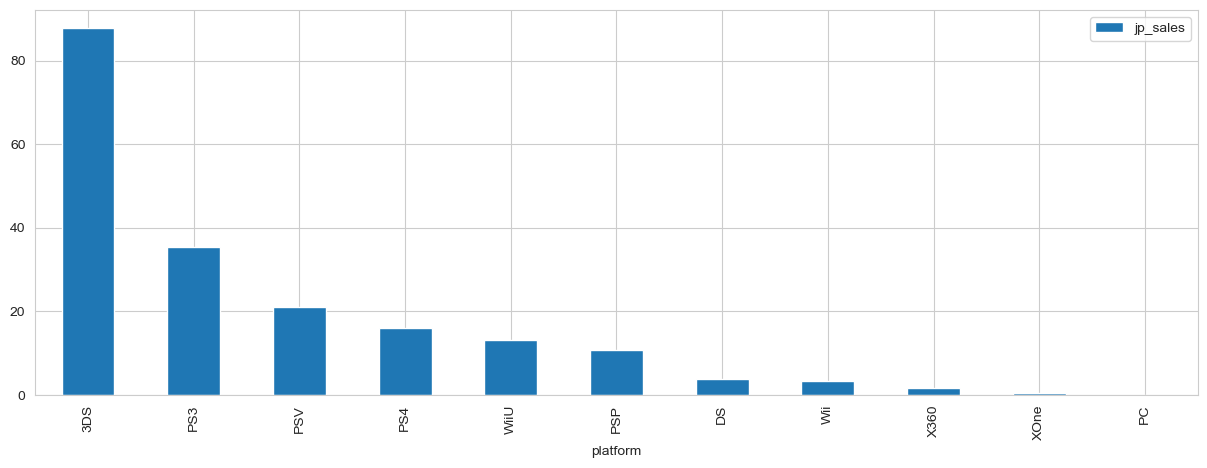

In [51]:
list_region = ['na_sales','eu_sales','jp_sales']
for i in list_region:
    popular_platform(i)

Вывод: 
- В Северной Америке самая популярная платформа X360 и XOne (4е место) - это консоль американская. Платформы PS3, PS4, 3DS - пользуются также значительной популярностью, но они японские
- В Европе самые популярные - японские платформы PS4 и PS3, на 3м и 4м месте Х360,XOne - американския консоль от Microsoft
- В Японии играют на консолях местного выпуска:Nintendo 3DS,PS3,PSV,PS4, WiiU- в тройке лидеров 2 портативные консоли. Так как в Японии много работают и мало времени провдят дома- портативный вариант более удобен для пользователей
- ***Выбор пользователей- консоли производства своей страны***

In [52]:
def popular_platform(region):
    data_users = data_since2012.pivot_table(index = 'genre', values = region, aggfunc = 'sum') \
    .sort_values(ascending=False, by = region)
    print('Самые популярные жанры для', data_users)
    print('\n\n')
    data_users.plot(kind = 'bar', figsize=(15,5))

Самые популярные жанры для               na_sales
genre                 
Action          180.15
Shooter         144.79
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13



Самые популярные жанры для               eu_sales
genre                 
Action          161.70
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40



Самые популярные жанры для               jp_sales
genre                 
Role-Playing     65.44
Action           52.80
Misc             13.10
Simulation       10.41
Fighting          9.44
Shooter           9.23
Platform          8.63
Adventure         8.24
Sports            8.01
Strategy        

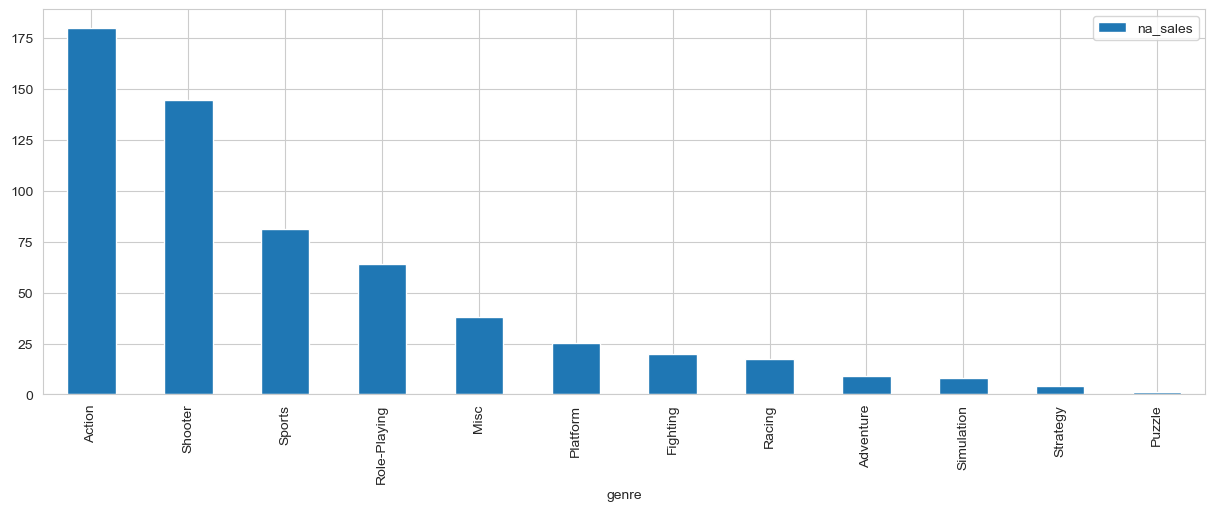

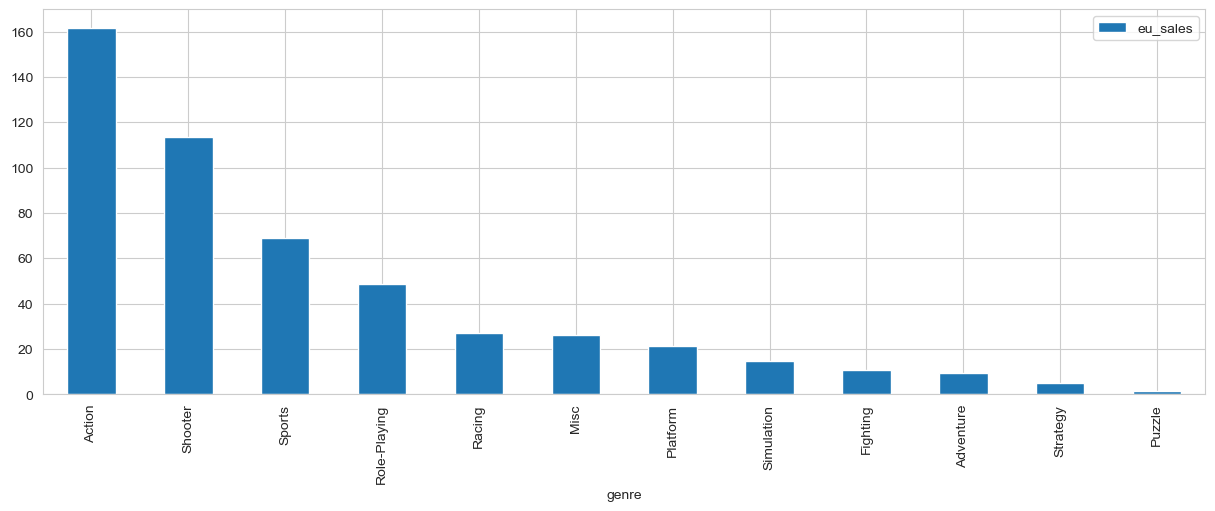

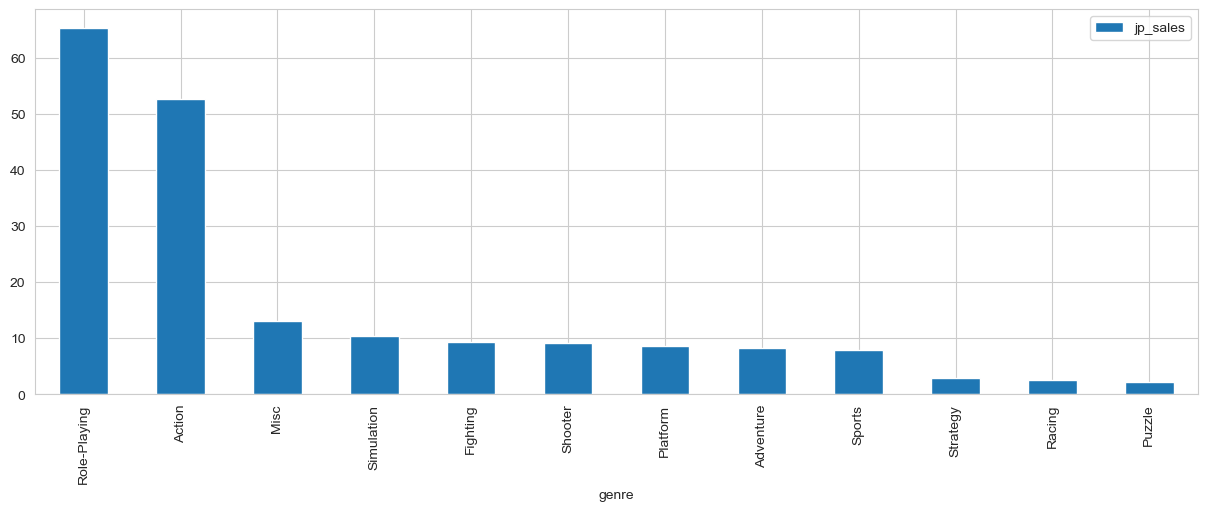

In [53]:
list_region = ['na_sales','eu_sales','jp_sales']
for i in list_region:
    popular_platform(i)

Вывод: 
- Пользователи Северной Америки и Европы играют в одни и те же приставки и видно, что чаще играют дома. Потому, что популярны жанры - Action, Sports, Shooter. В японии преобладают пользователи с портативными консолями, в которые можно играть не только дома, поэтому главный жанр - Role-Playing

In [54]:
#Заменим NaN на 'unknown' в столбце рейтинг

data_since2012['rating'].fillna('unknown', inplace=True)

ESRB = data_since2012.pivot_table(index = 'rating', values = ['na_sales','eu_sales','jp_sales'], aggfunc = 'sum')
ESRB

,eu_sales,jp_sales,na_sales
rating,,,
E,113.03,28.33,114.37
E10+,57.25,8.19,77.93
M,194.44,21.20,231.67
T,52.96,26.02,66.02
unknown,91.50,109.08,103.31


***Расшифровка индексов***
- E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
- E10+ - Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.
- T - Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.
- M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2


Вывод:
- Рейтинг влияет на продажи в отдельных регионах.
- Европа и Северная Америка выбирают схожие рейтинги.Самые популярные игры для лиц старше 17 лет ***M***. В Японии предпочитают игры для всех возрастных категорий ***E***

***Вывод:***
- Портрет пользователя ***Северной Америки*** : В Северной Америке самая популярная платформа X360 и XOne (4е место) - это консоль американская. Платформы PS3, PS4, 3DS - пользуются также значительной популярностью, но они японские.Пользователи чаще играют дома, поэтому самые популярные жанры Action, Sports, Shooter,Role-Playing,Misc.Самые популярные игры для лиц старше 17 лет - категория M рейтинга ESRB

- Портрет пользователя ***Европы*** : В Европе самые популярные - японские платформы PS4 и PS3, на 3м и 4м месте Х360,XOne - американския консоль от Microsoft.Пользователи чаще играют дома, поэтому самые популярные жанры Action, Sports, Shooter,Role-Playing,Racing.Самые популярные игры для лиц старше 17 лет - категория M рейтинга ESRB

- Портрет пользователя ***Японии***: В Японии играют на консолях местного выпуска:Nintendo 3DS,PS3,PSV,PS4, WiiU- в тройке лидеров 2 портативные консоли. Так как в Японии много работают и мало времени провдят дома- портативный вариант более удобен для пользователей. Поэтому главный жанр - Role-Playing.В Японии предпочитают игры для всех возрастных категорий E, не любят сцены насилия.

- ***Пользователи Европы и Японии очень схожи, они выбирают одинаковые жанры и категории игр***
- ***Выбор пользователей- консоли производства своей страны***
- ***Американское рейтинговое агенство не выставляла рейтинг для японских консолей***

### Проверка гипотез

***Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые?***
- Собираем данные
- data_since2012[data_since2012['platform'] == 'XOne', 'user_score'],
- data_since2012[data_since2012['platform'] == 'PC', 'user_score']
- Формулируем гипотезы:
- ***Н0:*** Средние пользовательские рейтинги платформ Xbox One и PC равны
- ***Н1:*** Средние пользовательские рейтинги платформ Xbox One не равен PC
- Выбираем уровень статистической значимости:
0,05
- Проверяем гипотезу кодом:
Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

In [55]:
XOne = data_since2012.loc[(data_since2012['platform'] == 'XOne') & (data_since2012['user_score'] > 0), 'user_score']
PC = data_since2012.loc[(data_since2012['platform'] == 'PC') & (data_since2012['user_score'] > 0), 'user_score']

alpha = 0.05
results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.6252774522173157
Не получилось отвергнуть нулевую гипотезу


Вывод:Не получилось отвергнуть нулевую гипотезу.Статистически значимой разницы между средним пользователемским рейтингом платформ Xbox One и PC нет.

***Гипотеза 2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?***


- Собираем данные
- data_since2012[data_since2012['genre'] == 'Action', 'user_score'],
- data_since2012[data_since2012['genre'] == 'Sports', 'user_score']
- Формулируем гипотезы:
- ***Н0:*** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны
- ***Н1:*** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные
- Выбираем уровень статистической значимости:
0,05
- Проверяем гипотезу кодом:
Метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind(array1, array2, equal_var, alternative)

In [56]:
Action = data_since2012.loc[(data_since2012['genre'] == 'Action') & (data_since2012['user_score'] > 0), 'user_score']
Sports = data_since2012.loc[(data_since2012['genre'] == 'Sports') & (data_since2012['user_score'] > 0), 'user_score']

alpha = 0.05
results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1405639632267916e-26
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу.Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

### Общий вывод

***Загрузка и Предобработка данных***

- Привели названия всех столбцов к змеиному регистру
- Поменяли типы данных в столбцах 'year_of_release','critic_score' на int64, а в столбце 'user_score' на float64
- В 'name','genre' пропущены по 2 значения-ими можно пренебречь (менее 1% пропусков)
- В 'critic_score','user_score','rating' большое количество пропусков. Предполагаю, что игры могут быть новинками и их еще не успели оценить критики и пользователи.Или эти игры не очень популярны(интересны), поэтому также остались без внимания. Еще есть распространенный вариант- проблемы при выгрузке данных.Всегда лучше перепроверить эту информацию у разарботчиков, которые выгружали данные
- Так как вариантнов их обработать нет и удалить их нельзя, так как в дальнейшем исказть нам анализ.Оставляем без изменений
- tbd можно расшифровать как to be determined (будет определено) или to be discussed (выносится на обсуждение) заменили на NaN
- Больше 40% пропусков в столбце рейтинг возможно связано с тем, что оценки выставляло Американское рейтинговое агенство, а пропуски для игр на японских консолях. Намеренно они не проставляли рейтинги у своих главных конкурентов или по-договоренности, нам не известно
- Кореляция тепловых карт дала возможность заполнить 123 пропуска в 'year_of_release' по столбцу 'name' с дургих платформ
- Явные и неявные дубликаты не обнаружены


***Исследовательский анализ данных***

- До 1995 года развитие игр на игровых платформах было несущественное-эти данные не берем в расчет
- С 1995г - 2008г мы наблюдаем фазу активного роста. C 2010г наступает рецессия. Предполагаю, что это связано с появлением игр на мобильных устройствах
- ***PS2,X360,PS3,Wii,DS,PS*** - это 6 лидеров.Разрыв продаж между 6м PS и 7м GBA почти в 2 раза
- Средний жизненный цикл игровой консоли составляет 8-10 лет
- Фаза активного роста - 5 лет, потом рецессия и уход с рынка
- Для прогноза продаж на 2017 год нам нужны платформы, которые будут в продаже в этот период и желательно в фазе роста или в пике жизненного цикла. Исходя из предыдущего анализа, мы должны взять данные по консолям за предыдущие 5 лет, т.е. ***начиная с 2012 года***
- Предположительно, в 2017 никто из существующих консолей не будут показывать рост
- Прибыль принесут только PS4 и XOne,так как они вышли позже.Все остальные платформы уйдут
- Мы оценили продажи по платформам начиная с 2012 года.У всех консолей разные медианы продаж,аномалий не наблюдается
- Топ 5 рейтинга(75% квартиль выше, чем у остальных консолей): ***X360,Wii, PS4, Xone,PS3***
- У критиков выражена прямую, средне-слабая корреляцию с "цифрами" продаж для PS4. Оценки пользователей корреляции с продажами не имеют
- Оценки критиков для платформ 'X360','PS3', 'XOne' демонстрируют прямую, слабоположительную корреляция с "цифрами" продаж. Оценки пользователей корреляции с продажами не имеют.Для платформы Wii наоборот - наблюдается слабоположительную корреляция оценок от пользователей с "цифрами" продаж, а оценки критиков корреляции с продажами не имеют
- Если исключить выбросы (очень прибыльные игры), то в ***лидеры выходит жанр Shooter***, на втором месте Sports, затем Platform(их медианы выше).В жанре Action много выбросов,поэтому ***общая прибыль по жанру Action выше остальных***. Но медиана меньше.

***Портрет пользователя каждого региона***

- Портрет пользователя ***Северной Америки*** : В Северной Америке самая популярная платформа X360 и XOne (4е место) - это консоль американская. Платформы PS3, PS4, 3DS - пользуются также значительной популярностью, но они японские.Пользователи чаще играют дома, поэтому самые популярные жанры Action, Sports, Shooter,Role-Playing,Misc.Самые популярные игры для лиц старше 17 лет - категория M рейтинга ESRB

- Портрет пользователя ***Европы*** : В Европе самые популярные - японские платформы PS4 и PS3, на 3м и 4м месте Х360,XOne - американския консоль от Microsoft.Пользователи чаще играют дома, поэтому самые популярные жанры Action, Sports, Shooter,Role-Playing,Racing.Самые популярные игры для лиц старше 17 лет - категория M рейтинга ESRB

- Портрет пользователя ***Японии***: В Японии играют на консолях местного выпуска:Nintendo 3DS,PS3,PSV,PS4, WiiU- в тройке лидеров 2 портативные консоли. Так как в Японии много работают и мало времени провдят дома- портативный вариант более удобен для пользователей. Поэтому главный жанр - Role-Playing.В Японии предпочитают игры для всех возрастных категорий E, не любят сцены насилия.

- ***Пользователи Европы и Японии очень схожи, они выбирают одинаковые жанры и категории игр***
- ***Выбор пользователей- консоли производства своей страны***

***Проверка гипотез***

- Статистически значимой разницы между средним пользователемским рейтингом платформ Xbox One и PC нет
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

### Вывод для отдела маркетинга

***Определяющие успешность игры закономерности, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании***

Успешность игры определяют 2 параметра: регион и пользователь, который будет в нее играть.Для планирования рекламных кампаний нужно акцентировать внимание на жанрах игры, интересных в каждом регионе.

Также игры необходимо выпускать для новых, перспективных платформ, так как жизненный цикл одной платформы очень короткий(не более 5 лет активных продаж).

Таким образом ключевые рекомендации, основанные на закономерностях:

- Прибыль принесут игры для платформ поколений PS и Xbox (***PS4 и XOne***).Разницы между средним пользователемским рейтингом этих платформ нет
- Для рынка Японии делать ставку на игры для PS4, в США - XOne и X360, в Европе PS4,X360, XOne
- Жанры Action, Sports, Shooter принесут больше прибыли от рекламной кампании в США и Европе(нельзя выделить один жанр, так как пользовательские рейтинги разные).Role-Playing- в Японии